# Speech Recognition Lab 2
Name: Hagar Tarek Abdelfatah

ID: 20221310699


## Import the data

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
neehakurelli_google_speech_commands_path = kagglehub.dataset_download('neehakurelli/google-speech-commands')

print('Data source import complete.')


100%|██████████| 1.38G/1.38G [00:28<00:00, 52.5MB/s]

Extracting files...


Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1/three/8dd788d8_nohash_0.wav
/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1/three/7ca023e2_nohash_0.wav
/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1/three/82b99576_nohash_0.wav
/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1/three/070b49af_nohash_0.wav
/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1/three/25040e85_nohash_0.wav
/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1/three/df6bd83f_nohash_0.wav
/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1/three/f84762e5_nohash_0.wav
/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1/three/8281a2a8_nohash_1.wav
/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1/three/6c0f6493

In [ ]:
import os
import shutil # Import the shutil module

# Move the data imported from kaggle into colab to make it easier to work with
data_path = '/root/.cache/kagglehub/datasets/neehakurelli/google-speech-commands/versions/1'
new_data_path = '/content/dataset'
os.makedirs(new_data_path, exist_ok=True)
shutil.move(data_path, new_data_path)

## Extract the files of numbers from zero to nine

In [4]:
# Define the target file names
Target_files = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
numbers_dir = []
dataset_dir = "/content/dataset/1" # The path to the dataset directory

# Iterate over items in the dataset directory
for item in os.listdir(dataset_dir):
    num_dir = os.path.join(dataset_dir, item)

    # Check if the item is a directory and its base name is in the list of numbers
    if os.path.isdir(num_dir) and os.path.basename(num_dir) in Target_files:
        numbers_dir.append(num_dir)

print(numbers_dir)

['/content/dataset/1/nine', '/content/dataset/1/one', '/content/dataset/1/two', '/content/dataset/1/six', '/content/dataset/1/four', '/content/dataset/1/seven', '/content/dataset/1/eight', '/content/dataset/1/five', '/content/dataset/1/three', '/content/dataset/1/zero']


## MFCC

In [5]:
import librosa
import os
# Loop through each directory in the numbers_dir list
for num_dir in numbers_dir:
    # Loop through all files within each number directory
    for file_name in os.listdir(num_dir):
        # Check if the file is a WAV file
        if file_name.endswith(".wav"):
            # Construct the full path to the audio file
            audio_file_path = os.path.join(num_dir, file_name)
            # Load the audio file using Librosa
            librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

            # Print the audio data
            print(librosa_audio_data)

Streaming output truncated to the last 5000 lines.
[-0.00182072 -0.00226607 -0.00219957 ... -0.0015662  -0.00150629
 -0.00297204]
[-9.5814976e-05  5.3741573e-04  1.0729340e-03 ... -1.3614059e-03
 -1.3984725e-03 -7.4222434e-04]
[ 6.37480980e-07  3.02443596e-06 -6.21355002e-06 ...  1.26073079e-04
  1.14934795e-04  6.38386045e-05]
[0.00027071 0.00032175 0.00039325 ... 0.00021179 0.0002982  0.00034718]
[7.1266998e-04 4.2855812e-04 2.9869596e-05 ... 4.7163824e-03 4.9250452e-03
 2.8572101e-03]
[-0.00117611 -0.0020811  -0.00234677 ... -0.00124507 -0.00190567
 -0.00133034]
[ 0.00020392  0.00032056  0.00034261 ... -0.00032773 -0.00049434
 -0.00034352]
[ 0.00025986  0.00040442  0.00034099 ... -0.00035556 -0.00076041
 -0.00088994]
[-1.1786150e-04 -1.3785352e-04 -8.8298213e-05 ...  5.8671657e-04
  9.0874452e-04  5.4524082e-04]
[-0.00781839 -0.01706422 -0.01947506 ... -0.00259613 -0.00095751
  0.        ]
[ 0.00079037  0.00229315  0.00415605 ... -0.00346578 -0.00279106
 -0.00099558]
[-0.00130991 -0

In [6]:
import os
import librosa
import numpy as np  # Make sure to import numpy

# List to store MFCCs for all dog sounds
all_mfccs = []

# Loop through each directory in numbers_dir
for num_dir in numbers_dir:
    # Loop through all files within each number directory
    for file_name in os.listdir(num_dir):  # Changed to num_dir
        # Check if the file is a WAV file
        if file_name.endswith(".wav"):
            # Construct the full path to the audio file
            audio_file_path = os.path.join(num_dir, file_name)

            # Compute MFCCs for the audio file
            mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)

            # Print the shape of MFCCs
            print(mfccs.shape)

            # Append MFCCs to the list
            all_mfccs.append(mfccs)  # Changed to mfccs

# Convert the list to a NumPy array
all_mfccs = np.array(all_mfccs)  # Changed variable name to avoid overwriting

print(all_mfccs)

Streaming output truncated to the last 5000 lines.
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40, 44)
(40,

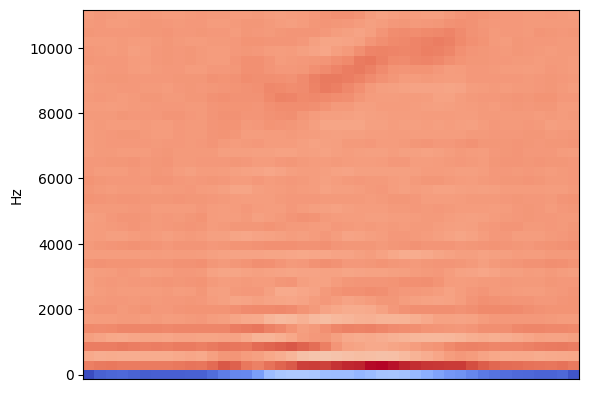

In [7]:
# Display the mfccs
librosa.display.specshow(mfccs, y_axis='linear')

## Data Augmentation

Apply data augmentation to help increae the accuracy of the model.

In [8]:
# Function for adding random noise to the data
def add_noise(audio, noise_level=0.01):
    random_noise = np.random.randn(len(audio))
    return audio + noise_level * random_noise

# Function for dynamic range compression (simulating loudness variation)
def dynamic_range_compression(audio, compression_rate=0.8):
    return np.sign(audio) * (np.abs(audio) ** compression_rate)

## Get the mean MFCCs


In [9]:
dataset = [] # Create a list to hold extracted MFCC features
cla = [] # Create a list to hold class labels for each audio sample

for num_dir in numbers_dir:
  # Extract the label (directory name) for classification
  number_label = os.path.basename(num_dir)
  for filename in os.listdir(num_dir):
    songname = os.path.join(num_dir, filename) # Full path to the audio file
    audio, sr = librosa.load(songname) # Load the audio file with librosa

    # Data Augmentation
    # Stretch the audio: Changes the playback speed to create variation
    audio = librosa.effects.time_stretch(audio, rate=1.2)
    # Add noise to the data: Increases robustness by simulating real-world noise conditions
    audio = add_noise(audio)
    # Compress dynamic range: Alters the amplitude range, making loud sounds quieter and quiet sounds louder
    audio = dynamic_range_compression(audio)

    # Extract MFCC features
    mfcc_fea = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T, axis=0)

    # Append extracted features and label to their lists
    dataset.append(mfcc_fea)
    cla.append(number_label)

In [10]:
d = {'Features':dataset,'class':cla}
extracted_features_df=pd.DataFrame(d)
extracted_features_df

,Features,class
0,"[-153.31758104001608, 19.102890628015068, 6.70...",nine
1,"[-153.38358067709967, 22.013153273681233, 8.84...",nine
2,"[-111.44328160680688, 32.51301136975013, -15.6...",nine
3,"[-177.829165854795, 9.894762810431883, 11.7087...",nine
4,"[-133.57315793597633, 15.989194331168088, -13....",nine
...,...,...
23661,"[-131.23230721383848, 43.647417518610865, 7.88...",zero
23662,"[-165.78060560404748, -3.2936857353171587, 0.5...",zero
23663,"[-124.57146376300723, 54.77855563777095, 20.03...",zero
23664,"[-139.35288894249516, 25.987395980229845, -4.7...",zero


In [11]:
# Convert the features and classes lists to arrays
X = np.array(extracted_features_df['Features'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [12]:
print(X.shape)
print(y.shape)

(23666, 40)
(23666,)


## Label Encoding

In [13]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels 'y' to numerical values
y_encoded = label_encoder.fit_transform(y)

print(y_encoded)

[3 3 3 ... 9 9 9]


## Split the Data


In [14]:
# Split the data into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=0)

In [15]:
print("X train:", X_train.shape)
print("X test:",X_test.shape)
print("y train:",y_train.shape)
print("y test:",y_test.shape)

X train: (18932, 40)
X test: (4734, 40)
y train: (18932,)
y test: (4734,)


## Build and Train the ANN Model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Reshape X_train and X_test to 2D before scaling
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Define the ANN model
model = Sequential([
    layers.Input(shape=(40,)),  # Input layer with shape 40
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Define early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3879 - loss: 1.7955 - val_accuracy: 0.5815 - val_loss: 1.2155
Epoch 2/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5763 - loss: 1.1932 - val_accuracy: 0.6010 - val_loss: 1.1337
Epoch 3/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6092 - loss: 1.0962 - val_accuracy: 0.6092 - val_loss: 1.1220
Epoch 4/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6385 - loss: 1.0404 - val_accuracy: 0.6097 - val_loss: 1.0952
Epoch 5/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6434 - loss: 1.0049 - val_accuracy: 0.6240 - val_loss: 1.0830
Epoch 6/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6608 - loss: 0.9521 - val_accuracy: 0.6306 - val_loss: 1.0749
Epoch 7/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6713 - loss: 0.9277 - val_accuracy: 0.6277 - val_loss: 1.0890
Epoch 8/50
474/474 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6925 - loss: 0.8802 - val_accuracy: 0

## Visualization (Accuracy and Loss Plots)

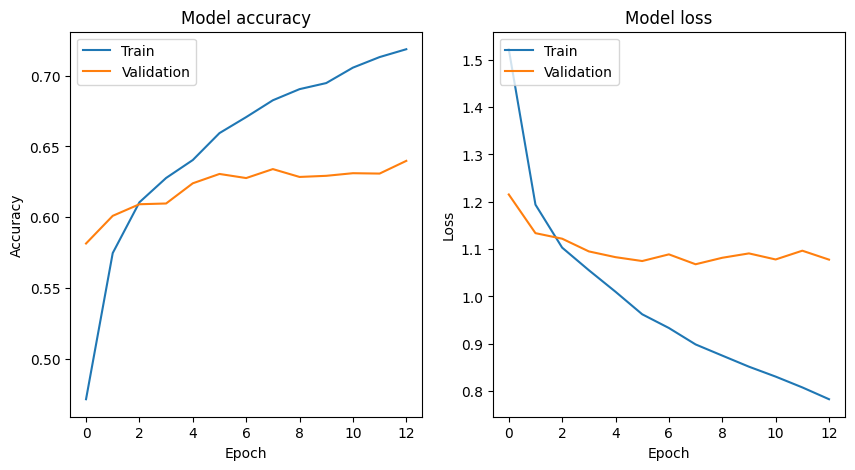

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()